## Seeding dynamic for a 2D kinematic driver

#### based on the stratocumulus stream function from Morrison & Grabowski 2007 and setup from Arabas et al. 2015
https://doi.org/10.1175/JAS3980

(see the Arabas et al. 2015 example in PySDM for more details)

In [1]:
import numpy as np

from PySDM import Formulae
from PySDM.physics import in_unit, si
from PySDM_examples.seeding.settings_2d import Settings
from PySDM_examples.seeding.simulation_2d import Simulation
from PySDM_examples.utils.kinematic_2d import Storage
from PySDM_examples.seeding.spin_up_2d import SpinUp

from seeding_utils import sav_as_xarr
import matplotlib.pyplot as plt
from matplotlib import pyplot
from PySDM_examples.Shipway_and_Hill_2012 import plot
from open_atmos_jupyter_utils import show_plot

In [ ]:
np.random.seed(123)

common_params = {
    "grid": (25, 25),
    "size": (1500 * si.metres, 1500 * si.metres),
    "simulation_time": 5400 * si.second,
    "dt": 5 * si.second,
    "spin_up_time": 1800 * si.second,
    "particles_per_volume_STP": 50 / si.cm**3,
    "n_sd_per_gridbox": 32,
    "radius": 0.04 * si.micrometre,
    "kappa": .3,
    "z_part": (0., 1),
    "x_part": (0., 1),
    "n_sd_seeding": 302,
    "seed_particles_per_volume_STP": 50 / si.cm**3,
    "seed_radius": 1 * si.micrometre,
    "seed_kappa": .8,
}

storage_seeding = Storage()
storage_no_seeding = Storage()
storage= {
    'seeding': storage_seeding,
    'no seeding': storage_no_seeding,
}
settings = {
    case: Settings(
            **common_params,
            formulae= Formulae(seed= np.random.randint(1000)),
            super_droplet_injection_rate = {
                'seeding': lambda time: 5 if 5 * si.min < time < 10 * si.min else 0,
                'no seeding': lambda _: 0,
            }[case],        )
    for case in ('seeding', 'no seeding')
}
simulations = {
    case: Simulation( 
        settings[case],
        storage[case], 
        SpinUp= SpinUp,
    )
    for case in ['seeding', 'no seeding']
}

simulations['seeding'].reinit()
simulations['seeding'].run()
simulations['no seeding'].reinit()
simulations['no seeding'].run()

/Users/hyfives-lamont/Desktop/cloud_seeding/PySDM/PySDM/backends/numba.py:48: UserWarning: Disabling Numba threading due to ARM64 CPU (atomics do not work yet)
  warnings.warn(


0.0% (times since last print: cpu=16.1s wall=13.1s)


<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


1.1% (times since last print: cpu=31.1s wall=31.3s)
2.2% (times since last print: cpu=0.5s wall=0.5s)
3.3% (times since last print: cpu=0.5s wall=0.5s)
4.4% (times since last print: cpu=0.5s wall=0.5s)
5.6% (times since last print: cpu=0.5s wall=0.5s)
6.7% (times since last print: cpu=0.9s wall=0.9s)
7.8% (times since last print: cpu=0.9s wall=0.9s)
8.9% (times since last print: cpu=1.1s wall=1.1s)
10.0% (times since last print: cpu=0.9s wall=0.9s)
11.1% (times since last print: cpu=0.9s wall=0.9s)
12.2% (times since last print: cpu=0.7s wall=0.7s)
13.3% (times since last print: cpu=0.6s wall=0.6s)
14.4% (times since last print: cpu=0.6s wall=0.6s)
15.6% (times since last print: cpu=0.6s wall=0.6s)
16.7% (times since last print: cpu=0.6s wall=0.6s)
17.8% (times since last print: cpu=0.6s wall=0.6s)
18.9% (times since last print: cpu=0.6s wall=0.7s)
20.0% (times since last print: cpu=0.6s wall=0.6s)
21.1% (times since last print: cpu=0.6s wall=0.6s)
22.2% (times since last print: cpu=0.

/Users/hyfives-lamont/Desktop/cloud_seeding/PySDM/PySDM/backends/numba.py:48: UserWarning: Disabling Numba threading due to ARM64 CPU (atomics do not work yet)
  warnings.warn(


0.0% (times since last print: cpu=8.4s wall=5.0s)


<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


1.1% (times since last print: cpu=1.1s wall=1.1s)
2.2% (times since last print: cpu=0.5s wall=0.5s)
3.3% (times since last print: cpu=0.5s wall=0.5s)
4.4% (times since last print: cpu=0.5s wall=0.5s)
5.6% (times since last print: cpu=0.5s wall=0.5s)
6.7% (times since last print: cpu=0.5s wall=0.5s)
7.8% (times since last print: cpu=0.5s wall=0.5s)
8.9% (times since last print: cpu=0.5s wall=0.5s)
10.0% (times since last print: cpu=0.5s wall=0.5s)
11.1% (times since last print: cpu=0.5s wall=0.5s)
12.2% (times since last print: cpu=0.5s wall=0.5s)
13.3% (times since last print: cpu=0.5s wall=0.5s)
14.4% (times since last print: cpu=0.5s wall=0.5s)
15.6% (times since last print: cpu=0.5s wall=0.5s)
16.7% (times since last print: cpu=0.5s wall=0.5s)
17.8% (times since last print: cpu=0.5s wall=0.5s)
18.9% (times since last print: cpu=0.5s wall=0.5s)
20.0% (times since last print: cpu=0.6s wall=0.6s)
21.1% (times since last print: cpu=0.6s wall=0.6s)
22.2% (times since last print: cpu=0.6s

In [3]:
rain_xarr= {case: sav_as_xarr('rain water mixing ratio', settings= settings[case], simulation= simulations[case]) for case in ['seeding', 'no seeding']}
coal_rate_xarr= {case: sav_as_xarr('cor', settings= settings[case], simulation= simulations[case]) for case in ['seeding', 'no seeding']}
sd_gridbox_xarr= {case: sav_as_xarr('super droplet count per gridbox', settings= settings[case], simulation= simulations[case]) for case in ['seeding', 'no seeding']}

100%|██████████| 91/91 [00:00<00:00, 8400.05it/s]


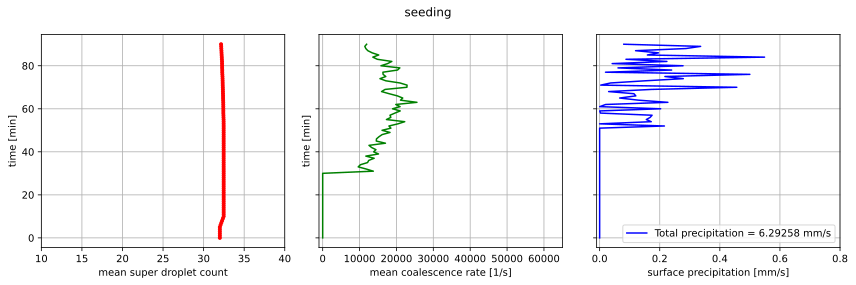

HTML(value="<a href='./MG2007_seeding.pdf' target='_blank'>./MG2007_seeding.pdf</a><br>")

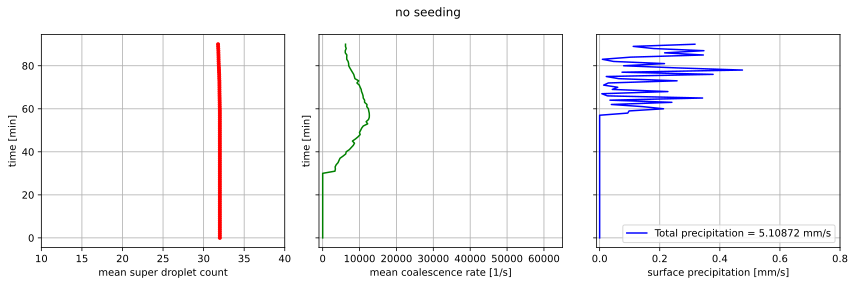

HTML(value="<a href='./MG2007_no_seeding.pdf' target='_blank'>./MG2007_no_seeding.pdf</a><br>")

In [4]:
for case in ['seeding', 'no seeding']:
    time = rain_xarr[case]['T'].dt.seconds

    fig, axs = pyplot.subplot_mosaic(
        [['a', 'b', 'c']],
        sharey=True,
        figsize=(12, 4),
        tight_layout=True
    )
    axs['a'].plot(
        sd_gridbox_xarr[case].mean(axis= (1, 2)).values,
        in_unit(time, si.min),
        marker='.',
        color='red',
    )
    axs['a'].set_ylabel("time [min]")
    axs['a'].set_xlabel("mean super droplet count")
    axs['a'].grid()
    axs['a'].set_xlim(10, 40)

    axs['b'].plot(
        coal_rate_xarr[case].mean(axis= (1,2)).values,
        in_unit(time, si.min),
        color='green',
    )
    axs['b'].set_ylabel("time [min]")
    axs['b'].set_xlabel("mean coalescence rate [1/s]")
    axs['b'].grid()
    axs['b'].set_xlim(-1000, 65000)

    axs['c'].plot(
        in_unit(rain_xarr[case].sel(Z= 30).sum(dim= 'X'), si.mm/si.s),
        in_unit(time, si.min),
        color='blue',
        label= r'Total precipitation = %.5f mm/s'%in_unit(rain_xarr[case].sel(Z= 30).sum(dim= 'X').sum(), si.mm/si.s)    
    )
    axs['c'].set_xlabel(f"surface precipitation [mm/s]")
    axs['c'].grid()
    axs['c'].legend(loc= 'lower right')
    axs['c'].set_xlim(-1E-2, 8E-1)

    fig.suptitle(case)
    show_plot(f"MG2007_{case.replace(' ', '_')}.pdf")